# Data Augmentation

## Objectives

* Augment the ASL dataset
* Use the augmented data to train an improved model
* Save the well-trained model to disk for use in deployment

## Preparing the Data

In [1]:
!pip install tensorflow

In [2]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("sign_mnist_train.csv")
valid_df = pd.read_csv("sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

## Model Creation

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

c:\Users\widas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

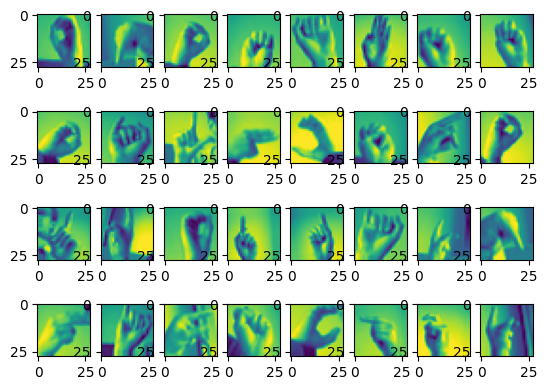

In [5]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

# Access the first batch using indexing
x, y = img_iter[0]

fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))

plt.show()

## Fitting the Data to the Generator

In [6]:
datagen.fit(x_train)

## Compiling the Model

In [7]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training with Augmentation

In [8]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch = int(len(x_train)/batch_size), # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/20


c:\Users\widas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


857/857 ━━━━━━━━━━━━━━━━━━━━ 52s 54ms/step - accuracy: 0.4669 - loss: 1.7873 - val_accuracy: 0.4034 - val_loss: 6.7993
Epoch 2/20
  1/857 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9375 - loss: 0.2092

c:\Users\widas\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9375 - loss: 0.2092 - val_accuracy: 0.4014 - val_loss: 6.7047
Epoch 3/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.8803 - loss: 0.3489 - val_accuracy: 0.4241 - val_loss: 9.9487
Epoch 4/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.3090 - val_accuracy: 0.4233 - val_loss: 9.7979
Epoch 5/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.9286 - loss: 0.2092 - val_accuracy: 0.3795 - val_loss: 11.2761
Epoch 6/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8750 - loss: 0.1673 - val_accuracy: 0.4223 - val_loss: 12.0456
Epoch 7/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.9492 - loss: 0.1498 - val_accuracy: 0.4391 - val_loss: 12.9571
Epoch 8/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.0438 - val_accuracy: 0.4388 - val_loss: 13.0634
Epoch 9/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.9575 - loss: 0.1319 - val_accuracy: 0

## Saving the Model

In [9]:
model.save('asl_model.keras')